In [10]:
import datajoint as dj

sales = dj.Schema('classicsales')
sales.spawn_missing_classes()

nations = dj.Schema('nation')
nations.spawn_missing_classes()

hotel = dj.Schema('hotel')
hotel.spawn_missing_classes()

university = dj.Schema('university')
university.spawn_missing_classes()

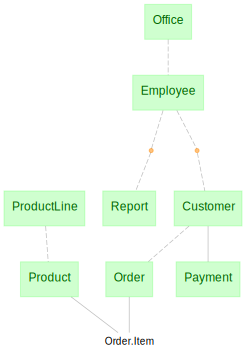

In [6]:
dj.Diagram(sales)

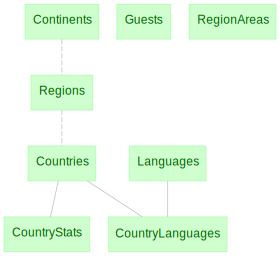

In [7]:
dj.Diagram(nations)

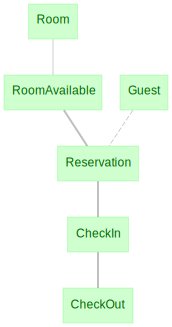

In [8]:
dj.Diagram(hotel)

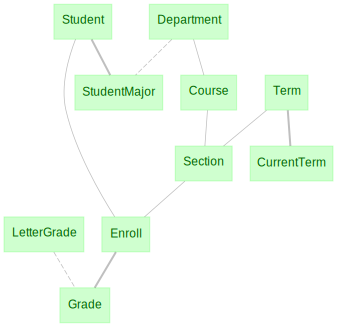

In [11]:
dj.Diagram(university)

# Homework 6: Joins

The following queries may require joins. Some queries may be performed using subquiries without joins.

# Homework 7: Aggregations

In [ ]:
# List all regions and the number 